In [1]:
import numpy as np
import cv2
import base64
import io
import matplotlib.pyplot as plt

In [2]:
np.random.seed(0)

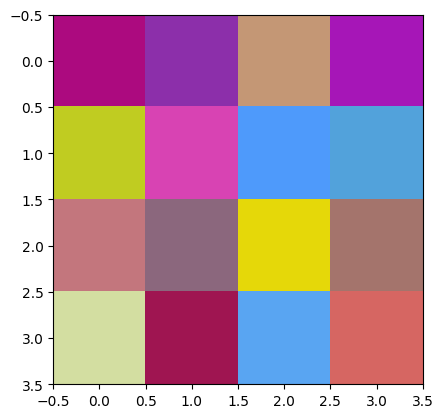

In [3]:
image = np.random.randint(0, 255, (4, 4, 3), dtype=np.uint8)
plt.imshow(image)

# bytearray

In [44]:
image_bytearray = bytearray(image)
image_bytearray

bytearray(b'\xac\n\x7f\x8c/\xaa\xc4\x97u\xa6\x16\xb7\xc0\xcc!\xd8C\xb3N\x9a\xfbR\xa2\xdb\xc3v}\x8bg}\xe5\xd8\t\xa4tl\xd3\xde\xa1\x9f\x15QY\xa5\xf2\xd6fb')

In [45]:
# image_decode = np.frombuffer(image_bytearray, dtype=np.uint8)
image_decode = np.asarray(image_bytearray, dtype=np.uint8)
print(image_decode.shape)
image_decode = image_decode.reshape(4, 4, 3)
print(image_decode.shape)
print(np.all(image == image_decode))

(48,)
(4, 4, 3)
True


Text(0.5, 1.0, 'decode')

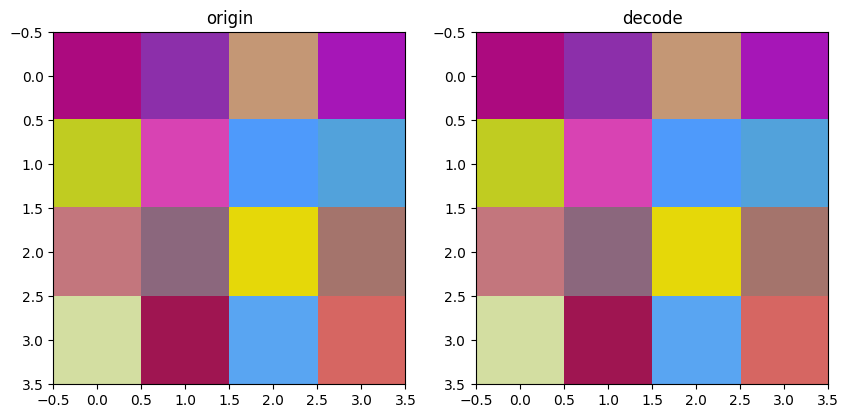

In [47]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))
axes[0].imshow(image)
axes[0].set_title("origin")
axes[1].imshow(image_decode)
axes[1].set_title("decode")

# base64

## 编码 cv2.imencode -> base64.b64encode

In [48]:
stat, image_cv_e = cv2.imencode(ext=".png", img=image)
print(stat)
print(image_cv_e.shape)
print(image_cv_e[:12])

True
(120,)
[137  80  78  71  13  10  26  10   0   0   0  13]


In [49]:
image_cv_e.tobytes()

b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x00\x04\x00\x00\x00\x04\x08\x02\x00\x00\x00&\x93\t)\x00\x00\x00?IDAT\x08\x1d\x014\x00\xcb\xff\x01\x7f\n\xac+%\xe0\xcbh8B\x7f\xe2\x01!\xcc\xc0\x92w\x18HWv\xe0\x08\x04\x01}v\xc3\x00\xf1\xc8\x8cqZc\x9c\xbf\x01\xa1\xde\xd3\xb07\xcc\xa1\x90\xbap\xc1}G\xb7\x18i\xee\xe7v\xc6\x00\x00\x00\x00IEND\xaeB`\x82'

In [50]:
base64.b64encode(image_cv_e) == base64.b64encode(image_cv_e.tobytes())

True

In [51]:
image_b64_e = base64.b64encode(image_cv_e)
image_b64_e

b'iVBORw0KGgoAAAANSUhEUgAAAAQAAAAECAIAAAAmkwkpAAAAP0lEQVQIHQE0AMv/AX8KrCsl4MtoOEJ/4gEhzMCSdxhIV3bgCAQBfXbDAPHIjHFaY5y/AaHe07A3zKGQunDBfUe3GGnu53bGAAAAAElFTkSuQmCC'

## 解码 base64.b64decode -> np.frombuffer -> cv2.imdecode

In [52]:
image_b64_d = base64.b64decode(image_b64_e)
image_b64_d

b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x00\x04\x00\x00\x00\x04\x08\x02\x00\x00\x00&\x93\t)\x00\x00\x00?IDAT\x08\x1d\x014\x00\xcb\xff\x01\x7f\n\xac+%\xe0\xcbh8B\x7f\xe2\x01!\xcc\xc0\x92w\x18HWv\xe0\x08\x04\x01}v\xc3\x00\xf1\xc8\x8cqZc\x9c\xbf\x01\xa1\xde\xd3\xb07\xcc\xa1\x90\xbap\xc1}G\xb7\x18i\xee\xe7v\xc6\x00\x00\x00\x00IEND\xaeB`\x82'

In [53]:
image_array = np.frombuffer(image_b64_d, dtype=np.uint8)
print(image_array.shape)
print(image_array[:12])

(120,)
[137  80  78  71  13  10  26  10   0   0   0  13]


In [56]:
image_decode1 = cv2.imdecode(
    buf=image_array,
    flags=cv2.IMREAD_COLOR,
)
print(image_decode1.shape)
print(np.all(image == image_decode1))

(4, 4, 3)
True


True
(4, 4, 3)


Text(0.5, 1.0, 'decode')

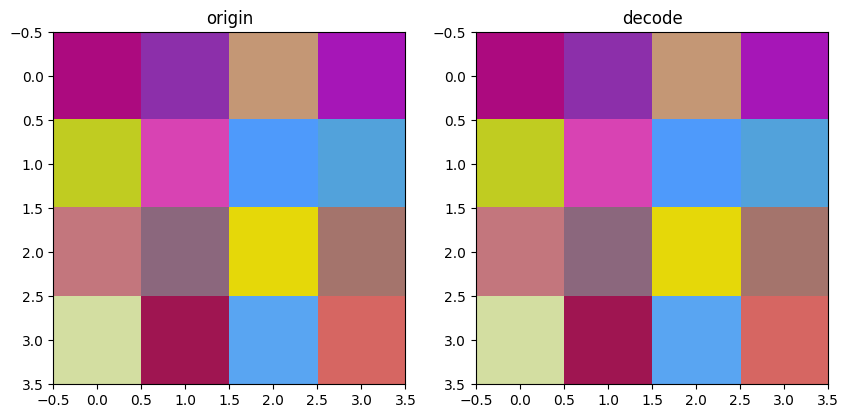

In [54]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))
axes[0].imshow(image)
axes[0].set_title("origin")
axes[1].imshow(image_decode1)
axes[1].set_title("decode")

# BytesIO

In [33]:
iobyte = io.BytesIO(image)
iobyte

In [43]:
# 获取buffer,使用frombuffer读取
image_io = np.frombuffer(iobyte.getbuffer(), dtype=np.uint8)
print(image_io.shape)
image_io = image_io.reshape(4, 4, 3)
print(image_io.shape)
print(np.all(image == image_io))

(48,)
(4, 4, 3)
True


Text(0.5, 1.0, 'image_io')

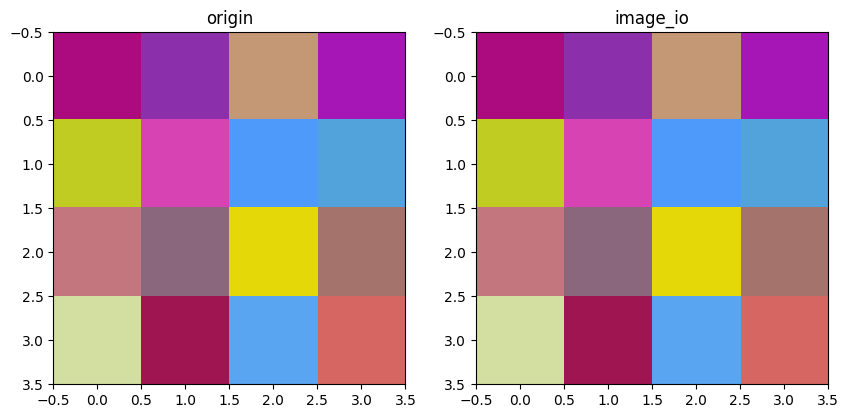

In [55]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))
axes[0].imshow(image)
axes[0].set_title("origin")
axes[1].imshow(image_io)
axes[1].set_title("image_io")